In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# setting configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# linking google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/Iowa Liquor /Prepared Data/liquor_demo_college_dist_clean.csv', index_col=0)
df.head()

,date,store_name,address,city,zip_code,county,category_name,vendor_name,item_description,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),unique_store,store_latitude,store_longitude,county_population,county_poverty_rate,county_median_earnings_(dollars),city_population,students_in_city,colleges_in_city,closest_college_kilometers,nearest_college,students_nearest_college,competitors_within_10_kilometers,competitors_within_5_kilometers,competitors_within_2_kilometers
0,07/04/2022,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,POLK,IMPORTED VODKAS,DIAGEO AMERICAS,KETEL ONE,6,1750,20.99,31.49,6,188.94,10.5,"410 NORTH ANKENY BLVD, ANKENY, 50021",41.734504,-93.602470,501089,10.1,42262,72222,23555.0,2.0,1.849264,Faith Baptist Bible College and Theological Se...,504,42,31,14
1,07/04/2022,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,POLK,AMERICAN FLAVORED VODKA,DIAGEO AMERICAS,"SMIRNOFF RED, WHITE & BERRY",6,1750,14.75,22.13,6,132.78,10.5,"410 NORTH ANKENY BLVD, ANKENY, 50021",41.734504,-93.602470,501089,10.1,42262,72222,23555.0,2.0,1.849264,Faith Baptist Bible College and Theological Se...,504,42,31,14
2,07/04/2022,HY-VEE WINE AND SPIRITS / HUBBELL,2310 HUBBELL AVE,DES MOINES,50317,POLK,COCKTAILS/RTD,PROXIMO,JOSE CUERVO AUTHENTIC LIME MARGARITA,6,1750,8.74,13.11,6,78.66,10.5,"2310 HUBBELL AVE, DES MOINES, 50317",41.604613,-93.574132,501089,10.1,42262,211034,9076.0,4.0,2.821928,Grand View University,1874,105,40,7
3,07/04/2022,UNIVERSITY LIQUORS / WDM,9250 UNIVERSITY AVE UNIT 115,WEST DES MOINES,50266,POLK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,DEKUYPER HOT DAMN!,12,750,6.75,10.13,6,60.78,4.5,"9250 UNIVERSITY AVE UNIT 115, WEST DES MOINES,...",41.599689,-93.834562,501089,10.1,42262,70741,0.0,0.0,6.698595,Des Moines University-Osteopathic Medical Center,1559,94,36,6
4,07/04/2022,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POLK,IMPORTED VODKAS,JIM BEAM BRANDS,EFFEN 80PRF,6,750,12.50,18.75,6,112.50,4.5,"1460 2ND AVE, DES MOINES, 50314",41.605652,-93.620233,501089,10.1,42262,211034,9076.0,4.0,0.910683,Des Moines Area Community College,23051,132,49,9


# 01. Regression Analysis - Stores vs Population
#### Hypothesis: as the population of a city rises so does the number of liquor stores.

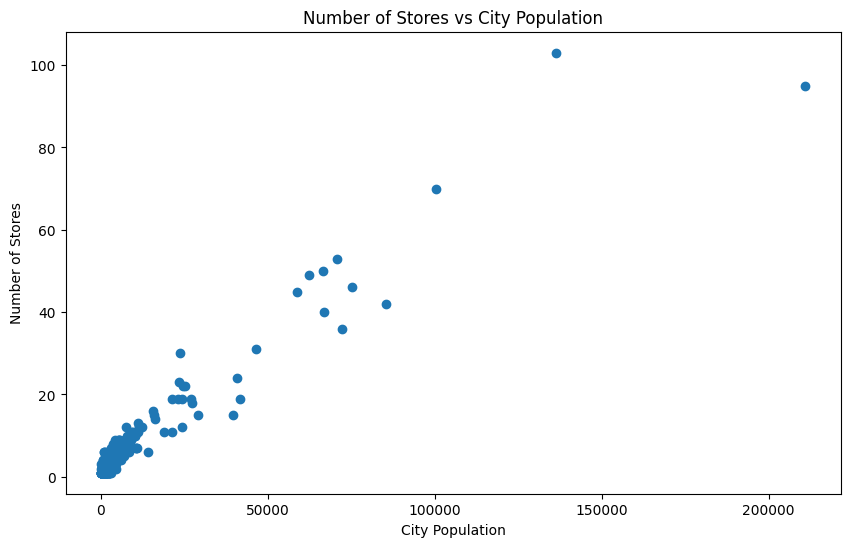

In [14]:
# group by 'city_population' and get the number of unique 'store_name'
store_count = df.groupby('city_population')['store_name'].nunique()

# reshape the variables into NumPy arrays and put them into separate objects
X = np.array(store_count.index).reshape(-1,1)
y = np.array(store_count.values).reshape(-1,1)

# create plot for the data
plt.figure(figsize=(10,6))
plt.scatter(X, y)

plt.xlabel('City Population')
plt.ylabel('Number of Stores')
plt.title('Number of Stores vs City Population')
plt.show()

In [15]:
# split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# create a regression object
regression = LinearRegression()

In [17]:
# fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

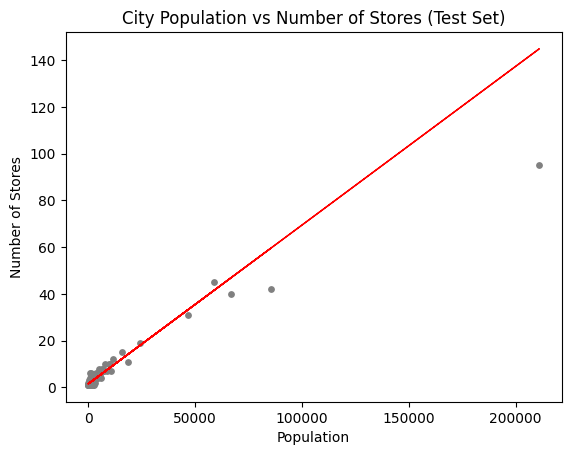

In [19]:
# create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =1)
plot_test.title('City Population vs Number of Stores (Test Set)')
plot_test.xlabel('Population')
plot_test.ylabel('Number of Stores')
plot_test.show()

In [20]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00067972]]
Mean squared error:  24.210487948070686
R2 score:  0.789764773343268


The positive slope means that as X rises (as the population rises), y slightly rises (the number of stores in the city  rises) at a degree of 0.00068. The MSE of 24.21 shows that on average the model's predictions are around the square root of this value (approximately 4.92 units) away from the actual number of stores. R² score is 0.789 or approximately 79%. This means that about 79% of the variability in the number of stores can be explained by the city population.

In [25]:
# dreate a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,8,6.263863
1,2,2.138635
2,3,2.466260
3,7,5.997412
4,4,3.815507
...,...,...
121,1,1.837518
122,1,1.901412
123,7,6.616638
124,42,59.510503


In [26]:
# compare how the regression fits the training set
y_predicted_train = regression.predict(X_train) # this is predicting X_train!

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00067972]]
Mean squared error:  5.480360621426785
R2 score:  0.9447295861869899


The fact that the model performs better on the training data than on the test data could be a sign of overfitting, which is when a model is so closely fitted to the training data that it performs poorly when presented with new, unseen data. However, it's also quite normal for a model to perform slightly better on training data than on test data, simply because the model is trained to fit the training data as closely as possible. While there is a noticeable difference, it may not necessarily indicate a serious problem, given that the R² on the test data is still relatively high at 79%.

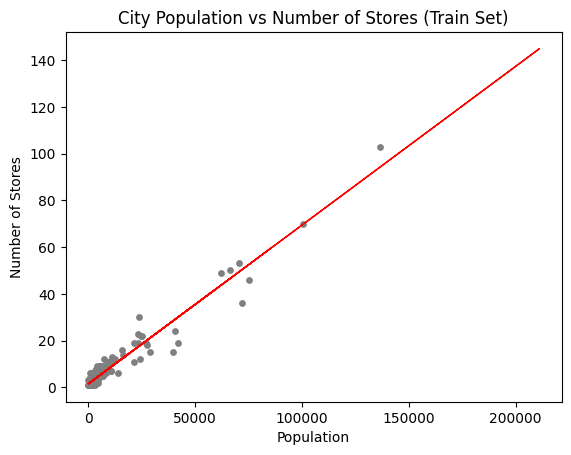

In [27]:
# create a plot that shows the regression line from the model on the test traning set
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =1)
plot_test.title('City Population vs Number of Stores (Train Set)')
plot_test.xlabel('Population')
plot_test.ylabel('Number of Stores')
plot_test.show()

# 02. Regression Analysis - Sales  vs Distance to Nearest College
### The closer the store is to a college the higher the sales will be.

In [7]:
# select subest of data, we will look at stores in the city Ames as it home to the largest college in Iowa.
ames_df = df[df['city'] == 'AMES']
ames_df.shape

(62556, 31)

In [8]:
ames_df.head()

,date,store_name,address,city,zip_code,county,category_name,vendor_name,item_description,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),unique_store,store_latitude,store_longitude,county_population,county_poverty_rate,county_median_earnings_(dollars),city_population,students_in_city,colleges_in_city,closest_college_kilometers,nearest_college,students_nearest_college,competitors_within_10_kilometers,competitors_within_5_kilometers,competitors_within_2_kilometers
515188,07/04/2022,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010,STORY,CANADIAN WHISKIES,HEAVEN HILL BRANDS,BLACK VELVET,6,1750,10.45,15.68,6,94.08,10.5,"626 LINCOLN WAY, AMES, 50010",42.021077,-93.618292,99673,19.4,24374,66950,31822.0,1.0,2.407378,Iowa State University,31822,36,32,10
515189,07/04/2022,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010,STORY,100% AGAVE TEQUILA,PERNOD RICARD USA,OLMECA ALTOS PLATA,6,750,14.99,22.49,6,134.94,4.5,"626 LINCOLN WAY, AMES, 50010",42.021077,-93.618292,99673,19.4,24374,66950,31822.0,1.0,2.407378,Iowa State University,31822,36,32,10
515190,07/04/2022,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010,STORY,AMERICAN CORDIALS & LIQUEURS,JIM BEAM BRANDS,DEKUYPER BLUE CURACAO,12,750,5.25,7.88,12,94.56,9.0,"626 LINCOLN WAY, AMES, 50010",42.021077,-93.618292,99673,19.4,24374,66950,31822.0,1.0,2.407378,Iowa State University,31822,36,32,10
515191,07/04/2022,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010,STORY,IMPORTED VODKAS,PERNOD RICARD USA,ABSOLUT SWEDISH VODKA 80PRF,12,1000,14.99,22.49,4,89.96,4.0,"626 LINCOLN WAY, AMES, 50010",42.021077,-93.618292,99673,19.4,24374,66950,31822.0,1.0,2.407378,Iowa State University,31822,36,32,10
515192,07/04/2022,CYCLONE LIQUORS,626 LINCOLN WAY,AMES,50010,STORY,IRISH WHISKIES,PERNOD RICARD USA,JAMESON,12,1000,19.98,29.97,12,359.64,12.0,"626 LINCOLN WAY, AMES, 50010",42.021077,-93.618292,99673,19.4,24374,66950,31822.0,1.0,2.407378,Iowa State University,31822,36,32,10


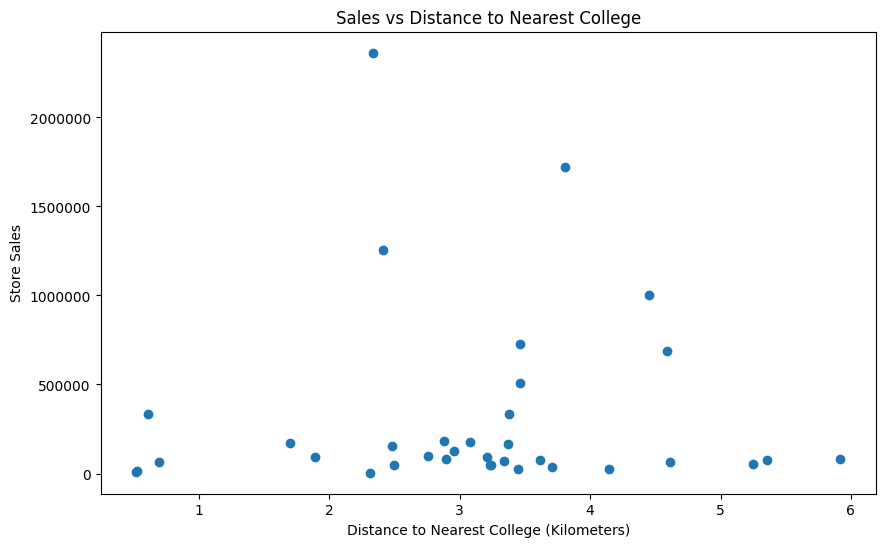

In [11]:
# group by 'closest_college_kilometers' and 'store_name', and sum 'sale_(dollars)'
sales_sum = ames_df.groupby(['closest_college_kilometers', 'store_name'])['sale_(dollars)'].sum().reset_index()

# group again by 'closest_college_kilometers' and sum 'sale_(dollars)'
sales_sum = sales_sum.groupby('closest_college_kilometers')['sale_(dollars)'].sum()

# reshape the variables into NumPy arrays and put them into separate objects
X = np.array(sales_sum.index).reshape(-1,1)
y = np.array(sales_sum.values).reshape(-1,1)

# create plot for the data
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Distance to Nearest College (Kilometers)')
plt.ylabel('Store Sales')
plt.title('Sales vs Distance to Nearest College')
plt.show()

In [12]:
# split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# create a regression object
regression = LinearRegression()

In [14]:
# fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

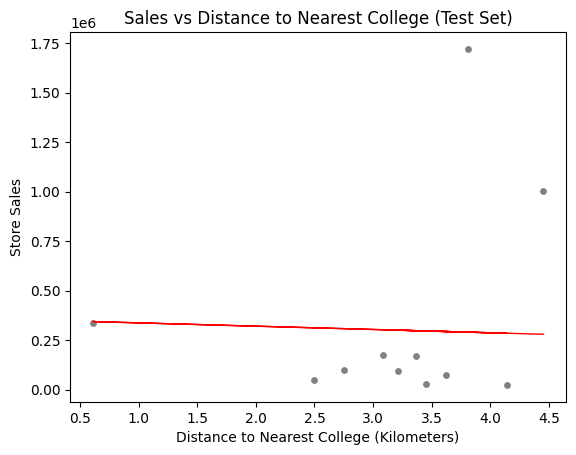

In [16]:
# create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =1)
plot_test.title('Sales vs Distance to Nearest College (Test Set)')
plot_test.xlabel('Distance to Nearest College (Kilometers)')
plot_test.ylabel('Store Sales')
plot_test.show()

In [17]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-16685.11847206]]
Mean squared error:  267891667116.5711
R2 score:  -0.0252527786856096


The MSE of about 267891667116.5711 is a measure of how well the model fits the data. In this case, the large value suggests that the model may not be a great fit to the data. This is supported by an R2 score of -0.025 which is quite bad.

